<a href="https://colab.research.google.com/github/Qianyue010/Qianyue-Jiao-Week3/blob/main/Revised_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-fae34dc4d18f>:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['CDD_bin', 'Region'])['Profit'].mean().unstack()
<ipython-input-1-fae34dc4d18f>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-1-fae34dc4d18f>:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')


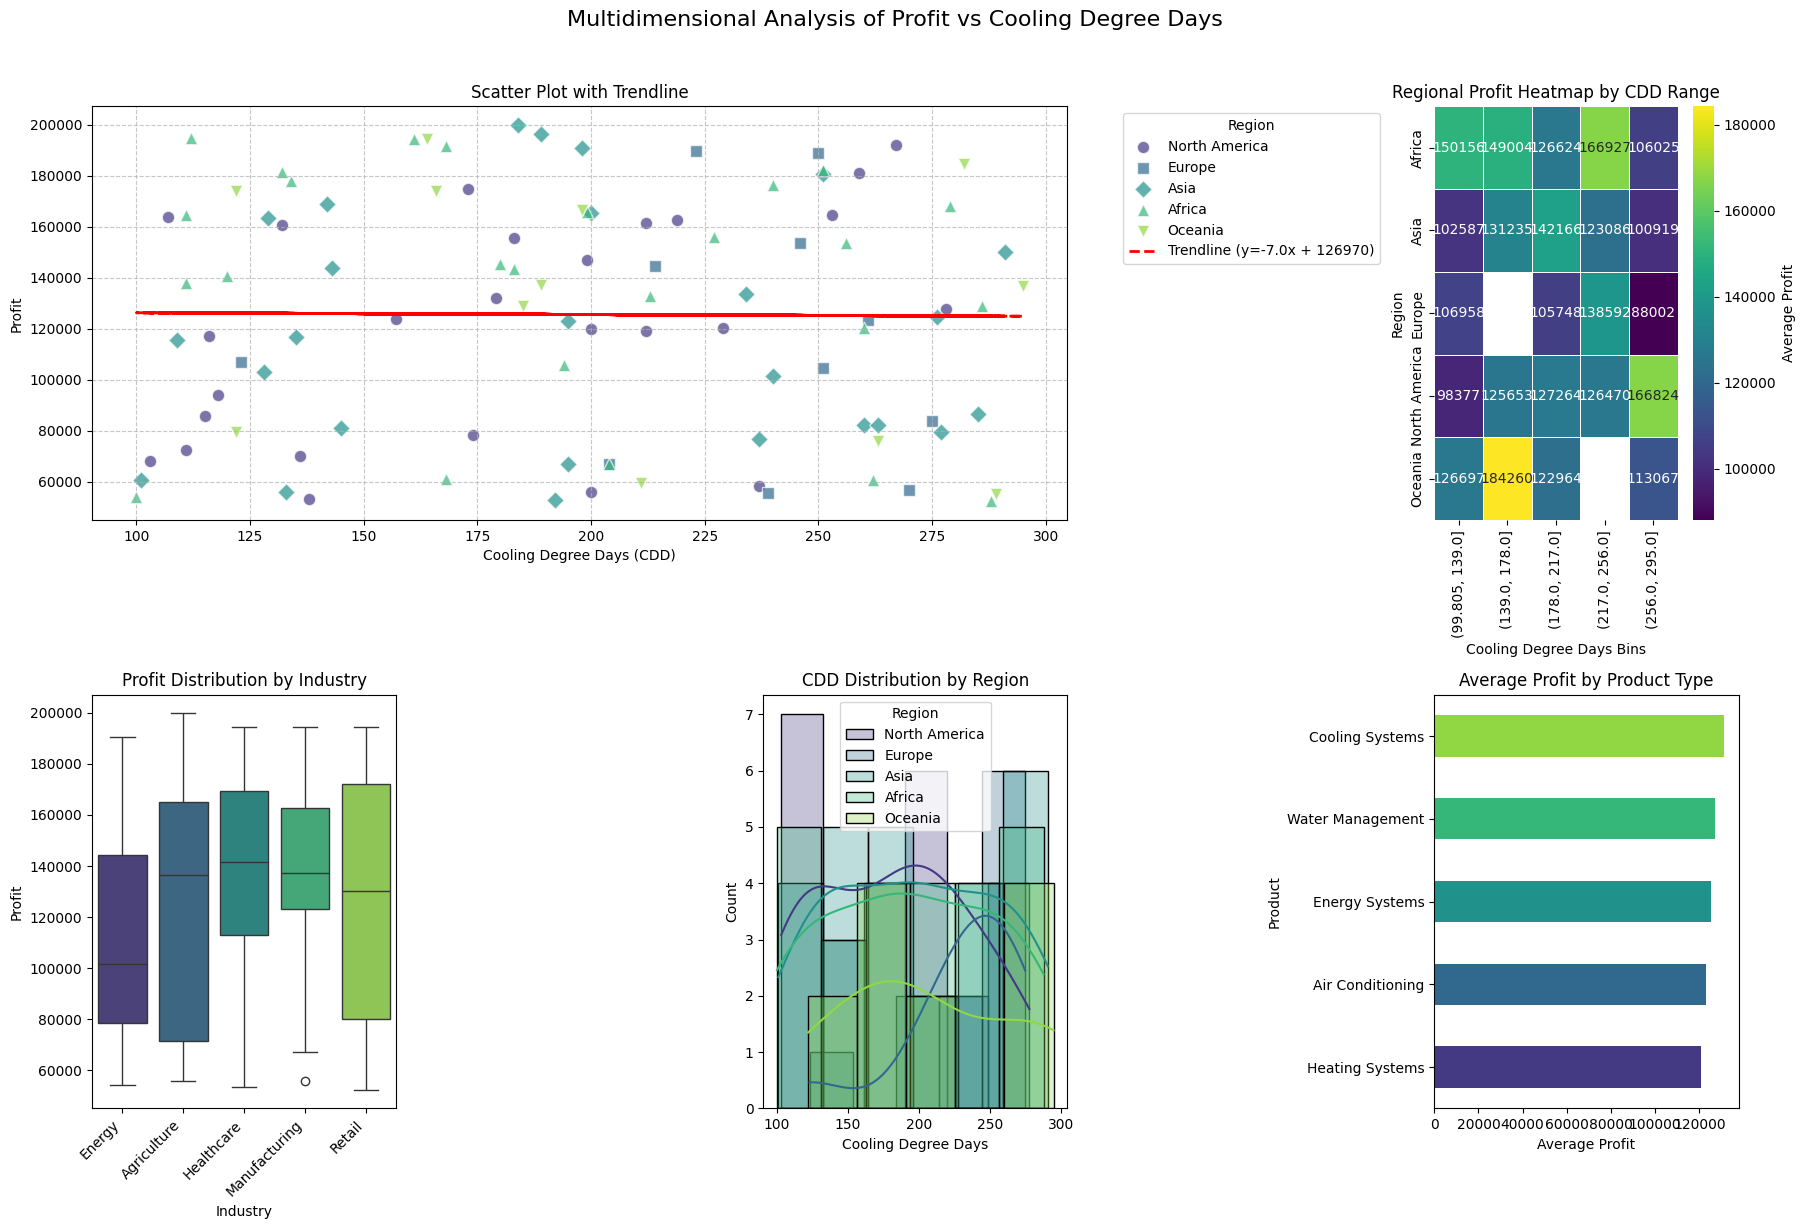

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


np.random.seed(42)
industries = ['Retail', 'Manufacturing', 'Healthcare', 'Energy', 'Agriculture']
products = ['Air Conditioning', 'Energy Systems', 'Water Management', 'Cooling Systems', 'Heating Systems']
regions = ['North America', 'Europe', 'Asia', 'Africa', 'Oceania']

data = {
    'Industry': np.random.choice(industries, 100),
    'Product': np.random.choice(products, 100),
    'Region': np.random.choice(regions, 100),
    'Profit': np.random.randint(50000, 200000, size=100),
    'Cooling Degree Days': np.random.randint(100, 300, size=100)
}
df = pd.DataFrame(data)


# 1. Use the color blind-friendly palette (Viridis) and different marking shapes
region_colors = sns.color_palette("viridis", n_colors=len(regions))  # Viridis
markers = ['o', 's', 'D', '^', 'v']

# 2. Create a composite chart layout
fig = plt.figure(figsize=(18, 12))
fig.suptitle('Multidimensional Analysis of Profit vs Cooling Degree Days', fontsize=16, y=1.02)

# Define complex layouts using GridSpec
gs = fig.add_gridspec(2, 3)

# Sub-figure 1: Main Scatter Plot (including trend line
ax1 = fig.add_subplot(gs[0, :2])

# Draw a scatter plot (with dual encoding of color and shape)
for i, region in enumerate(regions):
    region_data = df[df['Region'] == region]
    ax1.scatter(
        region_data['Cooling Degree Days'],
        region_data['Profit'],
        label=region,
        c=[region_colors[i]],
        marker=markers[i],
        s=80,
        alpha=0.7,
        edgecolors='w'
    )

# Add the trend line (all data)
z = np.polyfit(df['Cooling Degree Days'], df['Profit'], 1)
p = np.poly1d(z)
ax1.plot(df['Cooling Degree Days'], p(df['Cooling Degree Days']),
        "r--",
        linewidth=2,
        label=f'Trendline (y={z[0]:.1f}x + {z[1]:.0f})')

ax1.set_title('Scatter Plot with Trendline')
ax1.set_xlabel('Cooling Degree Days (CDD)')
ax1.set_ylabel('Profit')
ax1.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.7)

# -- Subfigure 2: Heat Map (CDD- Profit Density) --
ax2 = fig.add_subplot(gs[0, 2])

# Data aggregation: Calculate the average profit of each CDD interval
df['CDD_bin'] = pd.cut(df['Cooling Degree Days'], bins=5)
heatmap_data = df.groupby(['CDD_bin', 'Region'])['Profit'].mean().unstack()

sns.heatmap(
    heatmap_data.T,
    cmap='viridis',
    annot=True,
    fmt=".0f",
    linewidths=.5,
    ax=ax2,
    cbar_kws={'label': 'Average Profit'}
)
ax2.set_title('Regional Profit Heatmap by CDD Range')
ax2.set_xlabel('Cooling Degree Days Bins')
ax2.set_ylabel('Region')

# Subfigure 3: Box Plot by Industry
ax3 = fig.add_subplot(gs[1, 0])
sns.boxplot(
    data=df,
    x='Industry',
    y='Profit',
    palette='viridis',
    ax=ax3
)
ax3.set_title('Profit Distribution by Industry')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Subfigure 4: Regional CDD Distribution Histogram
ax4 = fig.add_subplot(gs[1, 1])
for i, region in enumerate(regions):
    sns.histplot(
        data=df[df['Region'] == region],
        x='Cooling Degree Days',
        color=region_colors[i],
        label=region,
        kde=True,
        alpha=0.3,
        ax=ax4
    )
ax4.set_title('CDD Distribution by Region')
ax4.legend(title='Region')

# Sub-figure 5: Product Type Profit Bar Chart
ax5 = fig.add_subplot(gs[1, 2])
product_profit = df.groupby('Product')['Profit'].mean().sort_values()
product_profit.plot(
    kind='barh',
    color=region_colors[:len(product_profit)],
    ax=ax5
)
ax5.set_title('Average Profit by Product Type')
ax5.set_xlabel('Average Profit')

# -- Adjust the overall layout --
plt.tight_layout()
plt.show()

In [ ]:
# Acknowledgment
#I would like to sincerely thank Professor Luyao Zhang for her invaluable guidance and support throughout this project.
#I am also deeply grateful to the two guest lecturers, whose insightful talks greatly enriched my perspective. Special thanks to Professor Jia Zhai, with whom I engaged during the symposium and from whom I received valuable academic input.
#I appreciate my classmates and peers for their collaborative feedback and meaningful discussions during the redesign process.
#Lastly, I would like to thank everyone else who contributed to this project in various ways.

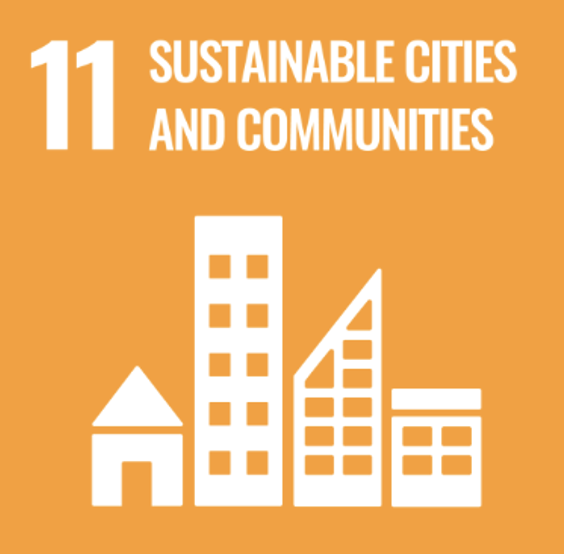

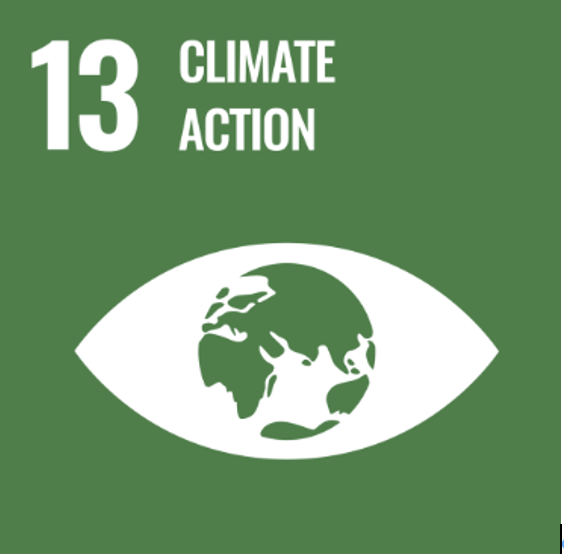

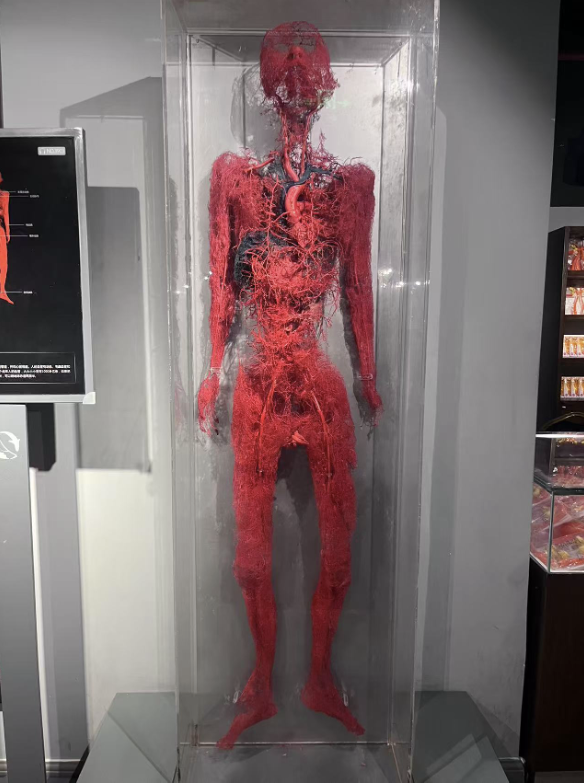

In [8]:
from IPython.display import Image, display

# SDG11
display(Image(filename='SDG11.png', width=300))

# SDG13
display(Image(filename='SDG13.png', width=300))

display(Image(filename='visit.png', width=300))